**Team ID : 211**

Shraddha Saraf

Sandeep Kaur

Surbhee Dewan

Kaitlyn Skamas

Milan Paremajalu Suresh


**About our Project**

Our project focuses on analyzing customer reviews for the popular restaurant chain, Panda Express, across multiple locations. We aim to identify trends and patterns in customer feedback to determine which locations receive the best and worst reviews. Through sentiment analysis, we will uncover the emotions driving these reviews, assessing factors such as customer demographics, age groups, and gender distribution. By understanding location-specific sentiments and reviewer characteristics, we hope to provide actionable insights for Panda Express to enhance customer satisfaction and tailor their services to meet diverse customer needs more effectively.


**Data Sources**

•	We have used two data files – Reviews and Business

•	We filtered the Business data file to identify Panda Express locations and then narrowed it down to four states: Arizona, California, Indiana, and Florida. This process resulted in a dataset containing business IDs for 50 Panda Express locations across these states.
We then applied these business IDs to the Review dataset to filter the relevant reviews, which we are now using for our analysis.



#Summary Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob


# Load the dataset
file_path = "/content/filtered_reviews.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
df.head()


review_id                 user_id             business_id  \
0  T_cL6Nk_W-H5bH0BwL57wQ  XOrq3ZorrmuakaWKQAKJ8w  q2cgYLHKRaujrQgSnqJPTA   
1  WhB-_yrPorZl_wtYa5xY5w  yXynaFrGECLMJ9eOtBvojQ  q2cgYLHKRaujrQgSnqJPTA   
2  nBGvD9lFMyZ_UkjGRQOTAg  5n4xLVuqOq2GVOtfxecEmQ  Ak_vHsHsYRP928VHVRL_tQ   
3  --wYBx_9vcWwPPIef4-QgA  LpFeVK2oVw0cicagg8Elsg  q2cgYLHKRaujrQgSnqJPTA   
4  puy-pFdjxlzirAA4PC18ug  vTHOhd8DXvZT4eHndd591g  q2cgYLHKRaujrQgSnqJPTA   

   stars  useful  funny  cool  \
0    1.0       0      0     0   
1    2.0       3      5     1   
2    4.0       0      0     0   
3    4.0       0      0     0   
4    3.0       0      0     0   

                                                text                 date  
0  For the time and effort I put into ordering on...  2018-02-24 00:58:48  
1  This was my first time at Panda Express. I fou...  2015-07-16 17:36:10  
2  SO good! Not very healthy, but I can't resist ...  2015-02-03 04:37:13  
3  Come here quite often.   Far and away my kids ...  2016-01-30 23:51:42  
4  Panda Express is good "fast food" Chinese food...  2011-11-01 21:39:31

In [2]:
df.describe(include='all')

review_id                 user_id  \
count                     1839                    1839   
unique                    1839                    1677   
top     T_cL6Nk_W-H5bH0BwL57wQ  OQaneFUkS1rJJvqfUzjb6g   
freq                         1                       6   
mean                       NaN                     NaN   
std                        NaN                     NaN   
min                        NaN                     NaN   
25%                        NaN                     NaN   
50%                        NaN                     NaN   
75%                        NaN                     NaN   
max                        NaN                     NaN   

                   business_id        stars       useful        funny  \
count                     1839  1839.000000  1839.000000  1839.000000   
unique                      50          NaN          NaN          NaN   
top     nyZHusbhW8JVonF5I5kJ0w          NaN          NaN          NaN   
freq                        93          NaN          NaN          NaN   
mean                       NaN     2.392061     0.752039     0.255574   
std                        NaN     1.497609     2.770996     1.975899   
min                        NaN     1.000000     0.000000     0.000000   
25%                        NaN     1.000000     0.000000     0.000000   
50%                        NaN     2.000000     0.000000     0.000000   
75%                        NaN     4.000000     1.000000     0.000000   
max                        NaN     5.000000    94.000000    73.000000   

               cool                                               text  \
count   1839.000000                                               1839   
unique          NaN                                               1835   
top             NaN  There are lots of people waiting in line! But ...   
freq            NaN                                                  2   
mean       0.295269                                                NaN   
std        2.593483                                                NaN   
min        0.000000                                                NaN   
25%        0.000000                                                NaN   
50%        0.000000                                                NaN   
75%        0.000000                                                NaN   
max       96.000000                                                NaN   

                       date  
count                  1839  
unique                 1839  
top     2018-02-24 00:58:48  
freq                      1  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

In [3]:
# Number of reviews
num_reviews = df.shape[0]
print(f"Number of Reviews: {num_reviews}")


Number of Reviews: 1839


In [4]:
# Ensure 'text' column is string type
df['text'] = df['text'].astype(str)

# Tokenization: Splitting text into words
df['tokenized_text'] = df['text'].apply(lambda x: x.split())

# Total number of tokens (words)
total_tokens = df['tokenized_text'].apply(len).sum()
print(f"Total Number of Tokens: {total_tokens}")


Total Number of Tokens: 164428


In [5]:
# Number of unique words (vocabulary size)
unique_words = len(set(word.lower() for review in df['tokenized_text'] for word in review))
print(f"Number of Unique Words: {unique_words}")


Number of Unique Words: 12196


In [6]:
# Average review length (words per review)
avg_review_length = df['tokenized_text'].apply(len).mean()
print(f"Average Review Length: {avg_review_length}")


Average Review Length: 89.4116367591082


In [7]:
# Number of unique customers
num_unique_customers = df['user_id'].nunique()
print(f"Number of Unique Customers: {num_unique_customers}")


Number of Unique Customers: 1677


In [8]:
# Number of unique businesses
num_unique_businesses = df['business_id'].nunique()
print(f"Number of Unique Businesses: {num_unique_businesses}")


Number of Unique Businesses: 50


In [9]:
# Average stars per review
avg_stars_per_review = df['stars'].mean()
print(f"Average Stars per Review: {avg_stars_per_review}")


Average Stars per Review: 2.3920609026644915


In [10]:
# Average votes (useful, funny, cool) per review
avg_useful_votes = df['useful'].mean()
avg_funny_votes = df['funny'].mean()
avg_cool_votes = df['cool'].mean()

print(f"Average Useful Votes per Review: {avg_useful_votes}")
print(f"Average Funny Votes per Review: {avg_funny_votes}")
print(f"Average Cool Votes per Review: {avg_cool_votes}")


Average Useful Votes per Review: 0.7520391517128875
Average Funny Votes per Review: 0.255573681348559
Average Cool Votes per Review: 0.29526916802610115


<ipython-input-11-0ad8b4c26c95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['stars'], palette="viridis")


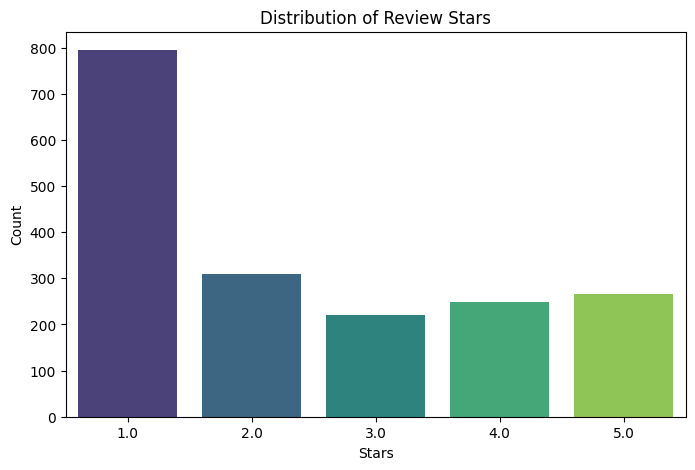

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of stars
plt.figure(figsize=(8, 5))
sns.countplot(x=df['stars'], palette="viridis")
plt.title("Distribution of Review Stars")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()


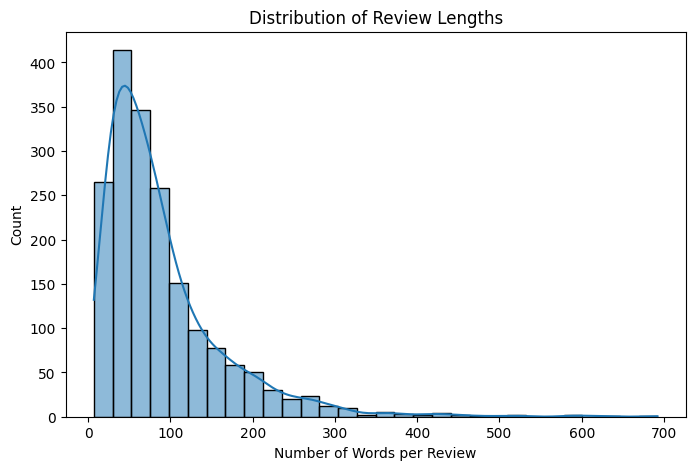

In [12]:
# Plot distribution of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['tokenized_text'].apply(len), bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words per Review")
plt.ylabel("Count")
plt.show()


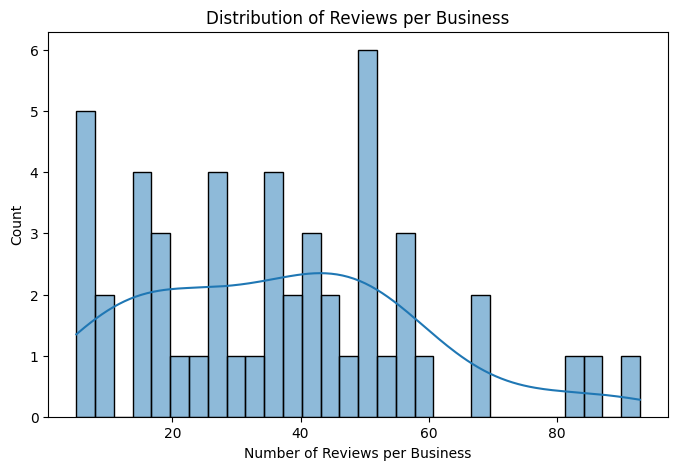

In [13]:
# Count number of reviews per business
business_review_counts = df['business_id'].value_counts()

# Plot distribution of business reviews
plt.figure(figsize=(8, 5))
sns.histplot(business_review_counts, bins=30, kde=True)
plt.title("Distribution of Reviews per Business")
plt.xlabel("Number of Reviews per Business")
plt.ylabel("Count")
plt.show()


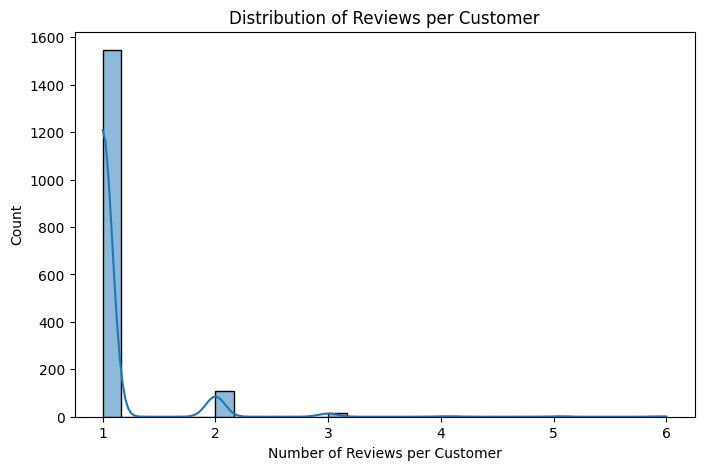

In [14]:
# Count number of reviews per customer
customer_review_counts = df['user_id'].value_counts()

# Plot distribution of customer reviews
plt.figure(figsize=(8, 5))
sns.histplot(customer_review_counts, bins=30, kde=True)
plt.title("Distribution of Reviews per Customer")
plt.xlabel("Number of Reviews per Customer")
plt.ylabel("Count")
plt.show()


In [15]:
import pandas as pd
from IPython.display import display

# Store summary statistics in a dictionary (assuming previous calculations are done)
stats_summary = {
    "Number of Reviews": num_reviews,
    "Total Number of Tokens": total_tokens,
    "Number of Unique Words": unique_words,
    "Average Review Length": avg_review_length,
    "Number of Unique Customers": num_unique_customers,
    "Number of Unique Businesses": num_unique_businesses,
    "Average Stars per Review": avg_stars_per_review,
    "Average Useful Votes per Review": avg_useful_votes,
    "Average Funny Votes per Review": avg_funny_votes,
    "Average Cool Votes per Review": avg_cool_votes,
}

# Convert to DataFrame for display
stats_df = pd.DataFrame(list(stats_summary.items()), columns=["Metric", "Value"])

# Display the statistics using pandas display function with styling for caption
display(stats_df.style.set_caption("Summary Statistics"))

#Data Evaluation

**(a) Suitability of the Data for Business Questions**

*   The dataset contains business details such as location (state, city, address, latitude, longitude), ratings (stars, review count), operational status (is open), attributes (e.g., parking, ambiance), and categories.
*   The dataset appears to contain customer reviews, with details such as ratings (stars), user engagement (useful, funny, cool), review text (text), and timestamps (date).

1.   	Business questions involve customer sentiment analysis, review trends, or rating distributions, this dataset is highly relevant.
2.   Review text allows for natural language processing (NLP) to extract insights on common complaints, praises, and recurring themes in customer feedback.

**(b) Sample Size Appropriateness**


*   The dataset of PANADA EXPRESS contains 50 businesses_id, and the Number of review rows in the data is 1,840.
*   The goal is to analyze trends across a large geographic area (four states) and analyze the review of PANDA EXPRESS restaurants.

**(c) Potential Biases in Data**
*	The dataset seems to focus on a specific chain ("Panda Express").
*	There could be location bias (e.g., urban vs. rural businesses may not be equally represented).
* Review-based data often have biases—for instance, customers are more likely to leave a review after a negative experience, potentially skewing the overall perception.

**(d) Challenges in Processing Data**
*	Some attributes (e.g., attributes and hours) are stored as a dictionary, requiring preprocessing.
*	The dataset structure may need normalization if additional business categories or attributes are introduced.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [17]:
# Load data
df_business = pd.read_excel("business_4states.xlsx")
df_reviews = pd.read_csv("filtered_reviews.csv")

In [18]:
# Ensure the correct column names
business_id_col = "business_id"
text_column = "text"
state_column = "state"  # Assuming 'state' column exists in business data
stars_column = "stars"  # Assuming 'stars' column is in filtered reviews

In [19]:
# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string to avoid errors
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [20]:
# Apply sentiment analysis
df_reviews["Sentiment"] = df_reviews[text_column].apply(get_sentiment)

In [21]:
# Merge reviews with business data to get state-wise details
df_merged = df_reviews.merge(df_business[[business_id_col, state_column]], on=business_id_col, how="left")


In [22]:
# Compute state-wise sentiment distribution
sentiment_by_state = df_merged.groupby([state_column, "Sentiment"]).size().unstack().fillna(0)

In [23]:
# Compute average stars per state
average_stars_by_state = df_merged.groupby(state_column)[stars_column].mean()

In [24]:
# Print state-wise sentiment distribution
print("\nState-wise Sentiment Distribution:")
print(sentiment_by_state)


State-wise Sentiment Distribution:
Sentiment  Negative  Neutral  Positive
state                                 
AZ              375       12       410
CA               85        5       110
FL              183        4       272
IN              108        6       269


In [25]:
# Print average stars per state
print("\nState-wise Average Star Ratings:")
print(average_stars_by_state)


State-wise Average Star Ratings:
state
AZ    2.138018
CA    2.455000
FL    2.533769
IN    2.718016
Name: stars, dtype: float64


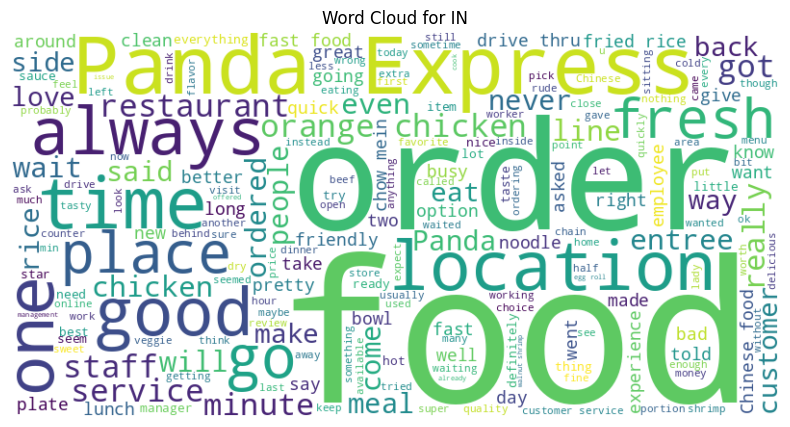

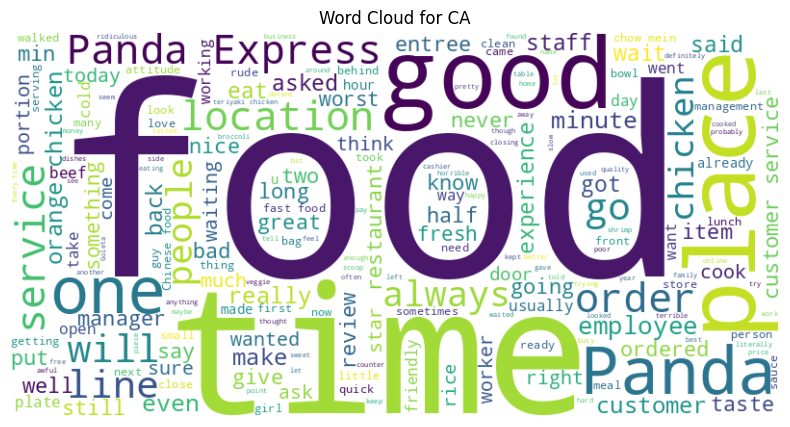

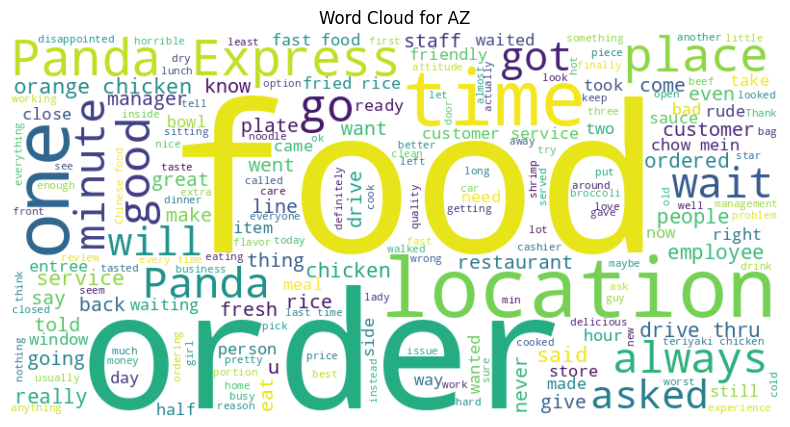

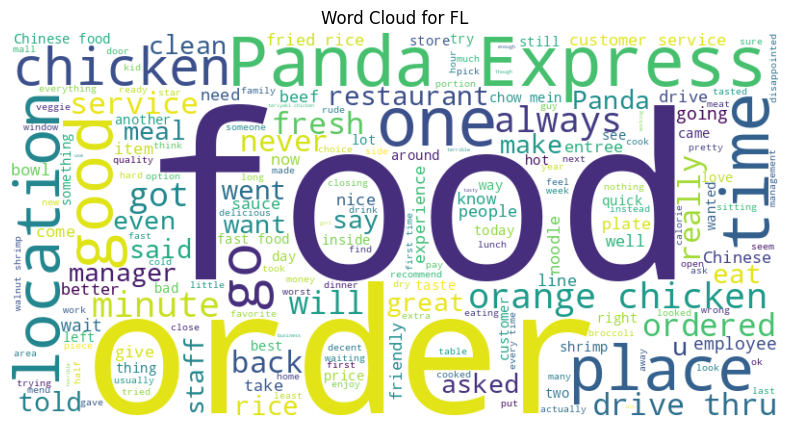

In [26]:
# Generate word clouds for each state
for state in df_merged[state_column].unique():
    state_reviews = df_merged[df_merged[state_column] == state][text_column].dropna()
    text = " ".join(state_reviews)

    if text:  # Only generate word cloud if there is text data
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for {state}")
        plt.show()

#Proposed Solution

We conducted a sentiment analysis by examining reviews across different Panda Express locations across four statewide regions to identify the most commonly used words. Given that these reviews come from individuals with diverse dialects, we aim to enhance our analysis by incorporating deep learning techniques such as TF-IDF and word vector representations. This will enable more accurate sentiment categorization and improve the contextual understanding of each word.


Top 10 words by TF-IDF score:
chicken    0.144740
time       0.132239
order      0.125430
service    0.119176
good       0.112717
rice       0.088107
drive      0.082524
don        0.081756
staff      0.075095
fresh      0.073343
dtype: float64


<ipython-input-27-b7dc455585eb>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tfidf.head(10).index, y=avg_tfidf.head(10).values, palette="viridis")


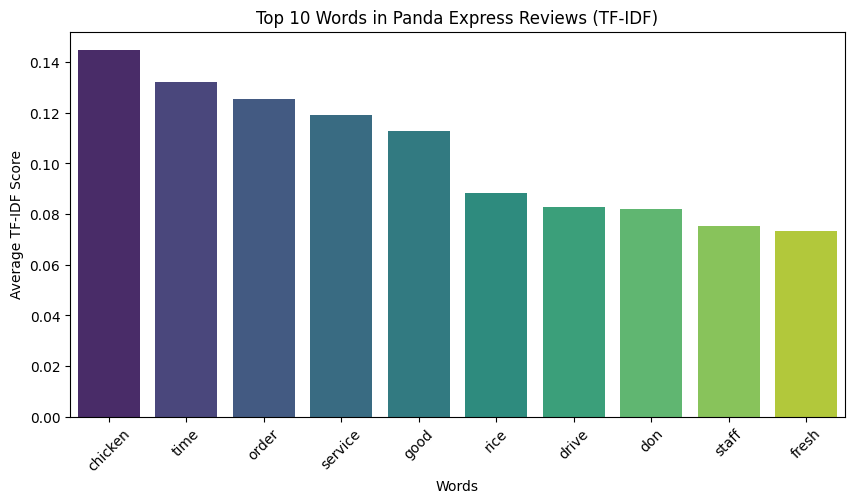

In [27]:
# TF-IDF to analyze the reviews of 50 Panda Express locations by identifying the most important words in the reviews while filtering out common, unimportant words.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load datasets
business_df = pd.read_excel("business_4states.xlsx")
reviews_df = pd.read_csv("filtered_reviews.csv")

# Ensure column names match for merging (modify as needed)
merged_df = reviews_df.merge(business_df, on='business_id', how='left')

# Drop rows with missing reviews
merged_df = merged_df.dropna(subset=['text'])

custom_stop_words = [
    'panda', 'express', 'food', 'restaurant', 'place', 'location',  # Business-related words
    'the', 'in', 'my', 'for', 'are', 'and', 'was', 'to', 'be', 'it', 'this', 'they',
    'is', 'of', 'an', 'on', 'you', 'but', 'or', 'if', 'so', 'at', 'there', 'with',
    'just', 'me', 'us', 'than', 'like', 'well', 'all', 'got', 'one', 'really'
]

# Combine sklearn's English stop words with the custom ones
final_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words=final_stop_words, max_features=20)  # Limit features for visualization

# Fit and transform TF-IDF on review text
tfidf_matrix = vectorizer.fit_transform(merged_df['text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Compute average TF-IDF score per word
avg_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Display top words and scores
print("\nTop 10 words by TF-IDF score:")
print(avg_tfidf.head(10))

# Visualization: Bar chart of top 10 words
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_tfidf.head(10).index, y=avg_tfidf.head(10).values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Average TF-IDF Score")
plt.title("Top 10 Words in Panda Express Reviews (TF-IDF)")
plt.show()


In [28]:
# TFIDF on each business and state
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load datasets
business_df = pd.read_excel("business_4states.xlsx")
reviews_df = pd.read_csv("filtered_reviews.csv")

# Ensure column names match for merging
merged_df = reviews_df.merge(business_df, on='business_id', how='left')

# Drop rows with missing reviews or business_id/state
merged_df = merged_df.dropna(subset=['text', 'business_id', 'state'])

# Define additional stop words
custom_stop_words = [
    'panda', 'express', 'food', 'restaurant', 'place', 'location',  # Business-related words
    'the', 'in', 'my', 'for', 'are', 'and', 'was', 'to', 'be', 'it', 'this', 'they',
    'is', 'of', 'an', 'on', 'you', 'but', 'or', 'if', 'so', 'at', 'there', 'with',
    'just', 'me', 'us', 'than', 'like', 'well', 'all', 'got', 'one', 'really'
]

# Combine sklearn's English stop words with the custom ones
final_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Initialize TF-IDF vectorizer with extended stop words
vectorizer = TfidfVectorizer(stop_words=final_stop_words, max_features=50)  # Adjust max_features if needed

# Fit and transform TF-IDF on review text
tfidf_matrix = vectorizer.fit_transform(merged_df['text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=merged_df['business_id'])

# Function to get top N keywords
def get_top_keywords(df, group_col, n=5):
    grouped_keywords = {}
    for group, group_df in df.groupby(group_col):
        avg_tfidf = group_df.select_dtypes(include=['number']).mean().sort_values(ascending=False)
        grouped_keywords[group] = avg_tfidf.head(n).index.tolist()
    return grouped_keywords

# Top words per business_id (each location)
top_words_per_business = get_top_keywords(tfidf_df, 'business_id', n=5)

# Top words per state
merged_df['state'] = merged_df['state'].astype(str)  # Ensure it's a string
tfidf_df_state = tfidf_df.copy()
tfidf_df_state['state'] = merged_df['state'].values
top_words_per_state = get_top_keywords(tfidf_df_state, 'state', n=5)

# Display results
print("\nTop words per business (location):")
for business_id, words in top_words_per_business.items():
    print(f"Business {business_id}: {words}")

print("\nTop words per state:")
for state, words in top_words_per_state.items():
    print(f"State {state}: {words}")




Top words per business (location):
Business -nwNPb3G-0L95igrhkvMtw: ['service', 'good', 'time', 'line', 'chicken']
Business 0SZy4uieBzBzg54vRdAfgw: ['chicken', 'make', 'rice', 'did', 'chinese']
Business 1IuLzYvrAleNSIc-FVgIYw: ['order', 'chicken', 'time', 'don', 'service']
Business 1PMlvTeQr3BpTm6GqOEckQ: ['service', 'good', 'mein', 'chicken', 'chow']
Business 1kKmTmnfDeycQRcYJA-5Zw: ['service', 'drive', 'order', 'don', 'time']
Business 45fGMPlGnOGmJZgnb4rGAQ: ['chicken', 'time', 've', 'make', 'rice']
Business 4lq9BmUFUOU8eQXdJ1naog: ['chicken', 'good', 'great', 'service', 'don']
Business 8Ap3xRqJCAQGK-BSPQdPJw: ['good', 'chicken', 'service', 'friendly', 'staff']
Business 8fIIeyRpL-osIWF8oDGOeA: ['chicken', 'good', 'chinese', 'great', 'orange']
Business Ak_vHsHsYRP928VHVRL_tQ: ['good', 'service', 'time', 'line', 'chicken']
Business B2fibZ80WW-DRXCO6tZsuQ: ['order', 'chicken', 'time', 'orange', 'ordered']
Business D71b7ktwXX3BwAY3-rk8fw: ['good', 'time', 'fast', 'order', 'staff']
Busin

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load datasets
reviews_df = pd.read_csv("/content/filtered_reviews.csv")
business_df = pd.read_excel("/content/business_4states.xlsx")


# Assuming 'stars' column is in 'reviews_df', ensure it's present after merging
reviews_df['Sentiment'] = reviews_df['stars'].apply(lambda x: 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))
# If 'stars' is from a different DataFrame, adjust the merge accordingly
merged_df = reviews_df.merge(business_df, on='business_id', how='left')


# Split data
X_train, X_test, y_train, y_test = train_test_split(merged_df['text'], merged_df['Sentiment'], test_size=0.2, random_state=42)

# Build TF-IDF + ML model pipeline
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=final_stop_words, max_features=100)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict sentiment on test data
y_pred = model_pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7445652173913043


In [37]:
# Load the datasets
users_df = pd.read_excel("User_dataset.xlsx", sheet_name="Sheet1")
reviews_df= df_reviews.copy()

# Define the restaurant chain business IDs as all unique business IDs in the reviews dataset
selected_chain_ids = reviews_df["business_id"].unique()

# Identify top reviewers (e.g., top 10% based on review_count)
review_threshold = users_df["review_count"].quantile(0.90)
top_reviewers = users_df[users_df["review_count"] >= review_threshold]

# Find reviewers who have reviewed the selected restaurant chain
chain_reviewers = reviews_df[reviews_df["business_id"].isin(selected_chain_ids)]["user_id"].unique()

# Count how many top reviewers have also reviewed the selected restaurant chain
top_chain_reviewers = top_reviewers[top_reviewers["user_id"].isin(chain_reviewers)]

print(f"Total top reviewers: {len(top_reviewers)}")
print(f"Top reviewers who reviewed the selected chain: {len(top_chain_reviewers)}")


Total top reviewers: 1002
Top reviewers who reviewed the selected chain: 7


In [38]:
# Install required libraries
!pip install bertopic umap-learn scikit-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [51]:
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load datasets
reviews_df = pd.read_csv("/content/filtered_reviews.csv")
business_df = pd.read_excel("/content/business_4states.xlsx")

# Merge reviews with business locations using business_id
merged_df = reviews_df.merge(business_df[['business_id', 'state']], on='business_id', how='left')

# Ensure reviews column is treated as string
merged_df['text'] = merged_df['text'].astype(str)

# Initialize BERTopic model
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

# Fit BERTopic on review texts
topics, probs = topic_model.fit_transform(merged_df['text'])

# Assign topics back to the dataset
merged_df['topic'] = topics

# Extract representative words for each topic
topic_info = topic_model.get_topic_info()
topic_words = {topic[0]: [word[0] for word in topic_model.get_topic(topic[0])] for topic in topic_info.values}

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on topic words
def classify_sentiment(topic_words, topic):
    if topic == -1:
        return "Neutral"

    words = topic_words[topic]
    sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words]

    # Calculate average sentiment score for the topic
    avg_sentiment = np.mean(sentiment_scores)

    if avg_sentiment > 0.055:
        return "Positive"
    elif avg_sentiment < 0.4:
        return "Negative"
    return "Neutral"

# Apply sentiment classification
merged_df["sentiment"] = merged_df["topic"].apply(lambda x: classify_sentiment(topic_words, x))

# Overall sentiment distribution
sentiment_counts = merged_df["sentiment"].value_counts()
print("\nOverall Sentiment Distribution:")
print(sentiment_counts)

# Sentiment distribution per location
location_sentiment_counts = merged_df.groupby("state")["sentiment"].value_counts().unstack()
print("\nSentiment Distribution by Location:")
print(location_sentiment_counts)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Overall Sentiment Distribution:
sentiment
Neutral     869
Negative    492
Positive    478
Name: count, dtype: int64

Sentiment Distribution by Location:
sentiment  Negative  Neutral  Positive
state                                 
AZ              231      410       156
CA               61       84        55
FL              113      207       139
IN               87      168       128


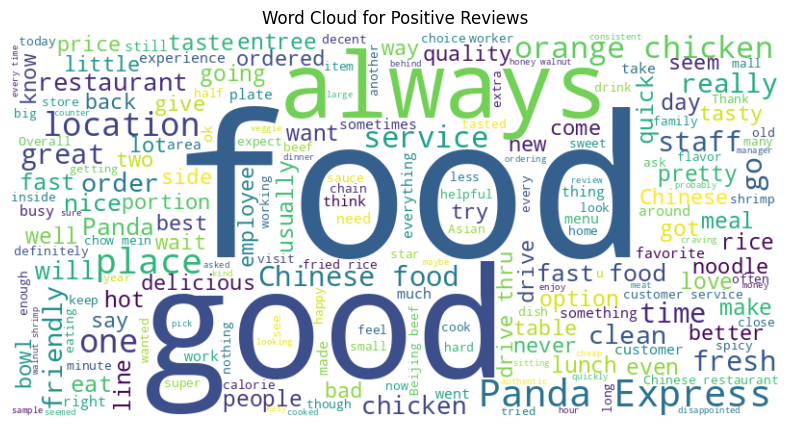

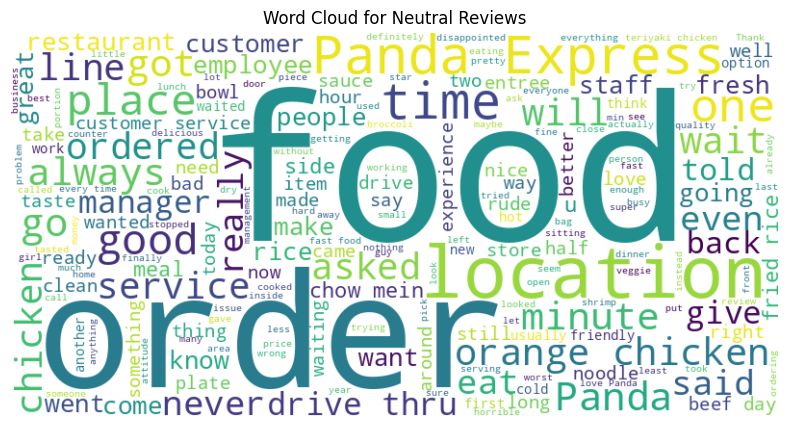

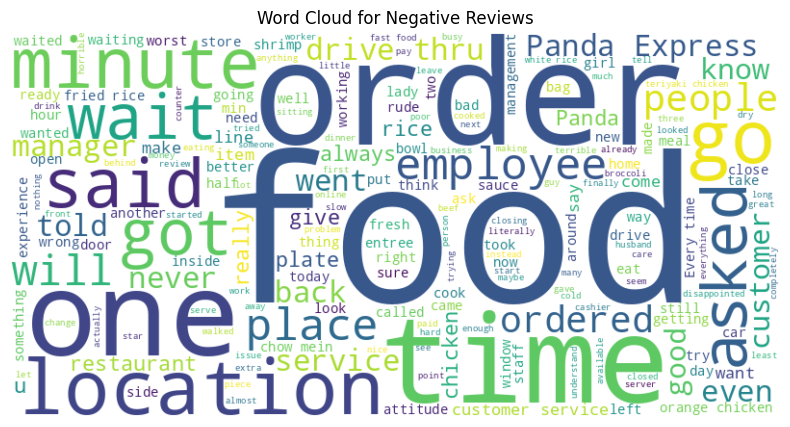

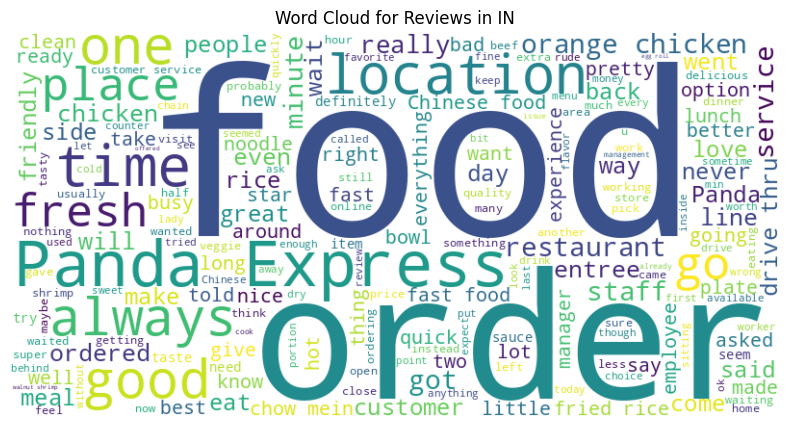

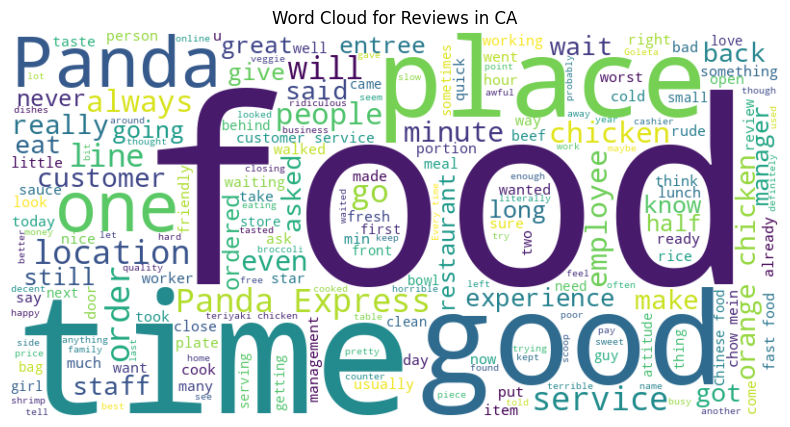

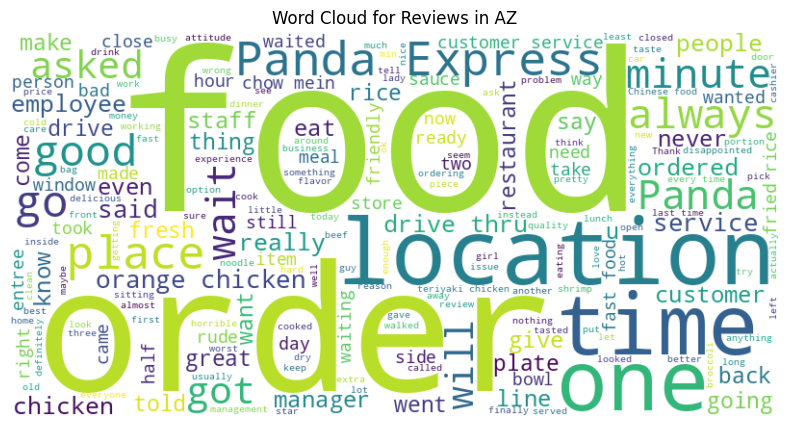

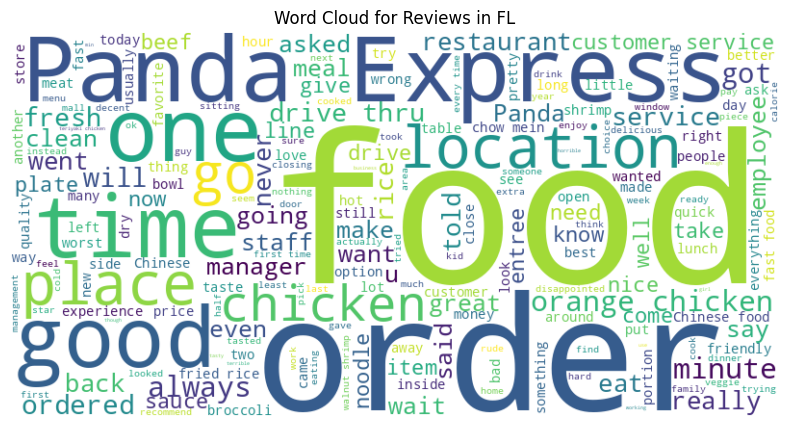

In [42]:
# Function to generate word cloud for each sentiment
def generate_wordcloud(title, text):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for each sentiment category
for sentiment in ["Positive", "Neutral", "Negative"]:
    sentiment_text = " ".join(merged_df[merged_df["sentiment"] == sentiment]["text"])
    generate_wordcloud(f"Word Cloud for {sentiment} Reviews", sentiment_text)

# Generate word clouds for each location
for state in merged_df["state"].unique():
    state_text = " ".join(merged_df[merged_df["state"] == state]["text"])
    generate_wordcloud(f"Word Cloud for Reviews in {state}", state_text)

# Probability Distribution

Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    1839 non-null   object 
 1   user_id      1839 non-null   object 
 2   business_id  1839 non-null   object 
 3   stars        1839 non-null   float64
 4   useful       1839 non-null   int64  
 5   funny        1839 non-null   int64  
 6   cool         1839 non-null   int64  
 7   text         1839 non-null   object 
 8   date         1839 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 129.4+ KB
None
                review_id                 user_id             business_id  \
0  T_cL6Nk_W-H5bH0BwL57wQ  XOrq3ZorrmuakaWKQAKJ8w  q2cgYLHKRaujrQgSnqJPTA   
1  WhB-_yrPorZl_wtYa5xY5w  yXynaFrGECLMJ9eOtBvojQ  q2cgYLHKRaujrQgSnqJPTA   
2  nBGvD9lFMyZ_UkjGRQOTAg  5n4xLVuqOq2GVOtfxecEmQ  Ak_vHsHsYRP928VHVRL_tQ   
3  --wYBx_9vcWwPPIef4-QgA 

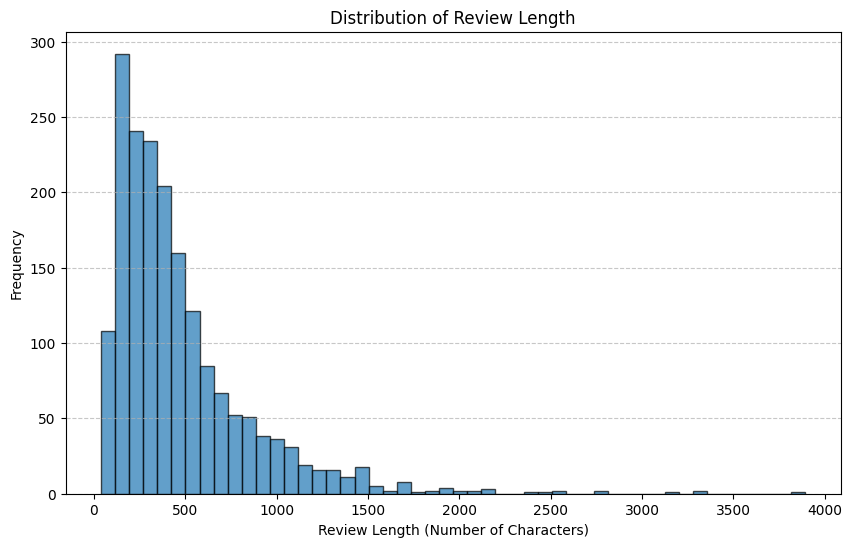

In [43]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path to the dataset in Google Drive
file_path = "/content/filtered_reviews.csv"  # Update the path if needed

# Load the dataset with only the first 5,000 rows
df = pd.read_csv(file_path, nrows=5000)

# Display basic information about the dataset
print("Dataset Loaded Successfully!")
print(df.info())  # Display dataset info to check structure
print(df.head())  # Display the first few rows of the dataset

# Calculate review length (character count) using the correct column name "text"
df['review_length'] = df['text'].astype(str).apply(len)

# Plot histogram of review length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Review Length (Number of Characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Length")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [44]:
!pip install umap-learn scikit-learn


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # limit to 5000 features to manage memory
tfidf_vectors = tfidf_vectorizer.fit_transform(df['text'].astype(str))


In [46]:
import umap.umap_ as umap

# Initialize UMAP with the specified parameters
umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)

# Fit and transform the TF-IDF vectors to lower-dimensional space
umap_embedding = umap_model.fit_transform(tfidf_vectors)

# Convert UMAP results to DataFrame for easier interpretation
umap_df = pd.DataFrame(umap_embedding, columns=[f'UMAP_{i+1}' for i in range(5)])

# Display first few rows of the reduced data
print(umap_df.head())


     UMAP_1    UMAP_2    UMAP_3     UMAP_4    UMAP_5
0  5.486349  7.280903  4.018517  18.178265  3.157390
1  7.154072  6.142162  4.733274  19.825590  5.054250
2  6.791584  6.268975  5.016991  20.432877  4.575288
3  7.014173  6.286777  5.057479  18.343353  5.324657
4  7.398807  6.560718  4.978266  20.451399  4.858315


In [47]:
# Install required libraries
!pip install bertopic umap-learn scikit-learn hdbscan

In [48]:

# Import necessary libraries
import pandas as pd
import umap.umap_ as umap
from sklearn.feature_extraction.text import TfidfVectorizer
from bertopic import BERTopic

# Apply UMAP dimensionality reduction
umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)
umap_embedding = umap_model.fit_transform(tfidf_vectors)

# Convert UMAP results to DataFrame
umap_df = pd.DataFrame(umap_embedding, columns=[f'UMAP_{i+1}' for i in range(5)])

# Display the transformed UMAP data
print("\nUMAP Dimensionality Reduction Completed:")
print(umap_df.head())

# Initialize and run BERTopic
topic_model = BERTopic(nr_topics="auto")  # Automatically determine topics
topics, probs = topic_model.fit_transform(df['text'].astype(str))

# Add topic labels to the original DataFrame
df['topic'] = topics

# Display first few rows with topic assignments
print("\nTopic Modeling Completed - Sample Topics Assigned:")
print(df[['text', 'topic']].head())

# Visualize the topics
topic_model.visualize_topics()



UMAP Dimensionality Reduction Completed:
     UMAP_1    UMAP_2    UMAP_3     UMAP_4    UMAP_5
0  5.486349  7.280903  4.018517  18.178265  3.157390
1  7.154072  6.142162  4.733274  19.825590  5.054250
2  6.791584  6.268975  5.016991  20.432877  4.575288
3  7.014173  6.286777  5.057479  18.343353  5.324657
4  7.398807  6.560718  4.978266  20.451399  4.858315

Topic Modeling Completed - Sample Topics Assigned:
                                                text  topic
0  For the time and effort I put into ordering on...      3
1  This was my first time at Panda Express. I fou...      0
2  SO good! Not very healthy, but I can't resist ...     -1
3  Come here quite often.   Far and away my kids ...      0
4  Panda Express is good "fast food" Chinese food...      0


In [49]:
import pandas as pd

# Get topic information: topic ID, count, and representative words
topic_info = topic_model.get_topic_info()

# Extract the top 6 topics (excluding topic -1, which is for outliers)
top_6_topics = topic_info[topic_info['Topic'] != -1].head(6)

# Display topic information
print("\nTop 6 Extracted Topics:")
print(top_6_topics)

# Get representative documents for each of the top 6 topics
for topic_id in top_6_topics['Topic']:
    print(f"\nTopic {topic_id} Representative Documents:")
    sample_docs = df[df['topic'] == topic_id]['text'].sample(3, random_state=42)  # Show 3 random docs
    for doc in sample_docs:
        print(f"- {doc[:300]}...")  # Print first 300 characters for readability

# Visualize the top 6 topics with their keywords
topic_model.visualize_barchart(top_n_topics=6)



Top 6 Extracted Topics:
   Topic  Count                     Name  \
1      0    374       0_the_and_panda_to   
2      1    242        1_the_food_and_is   
3      2     83         2_they_to_the_at   
4      3     62   3_order_to_online_they   
5      4     47         4_to_the_she_and   
6      5     30  5_teriyaki_and_sauce_to   

                                      Representation  \
1  [the, and, panda, to, express, was, is, it, of...   
2  [the, food, and, is, chinese, for, good, to, y...   
3  [they, to, the, at, and, open, of, closing, ou...   
4  [order, to, online, they, in, and, the, my, re...   
5     [to, the, she, and, me, her, was, my, for, in]   
6  [teriyaki, and, sauce, to, the, chicken, it, o...   

                                 Representative_Docs  
1  [My daughter and I love going to Panda Express...  
2  [This is my favorite place to eat. I love it. ...  
3  [Wowza, I mean do any of us ever check or leav...  
4  [Customer Service was probably some of the wor... 

In [50]:
import numpy as np

# Extract the top 6 topic IDs
top_6_topics_list = top_6_topics['Topic'].tolist()

# 1️⃣ **Intertopic Distance Map** (only for top 6 topics)
fig1 = topic_model.visualize_topics(top_n_topics=6)
fig1.show()

# 2️⃣ **Topic Hierarchy** (only for top 6 topics)
fig2 = topic_model.visualize_hierarchy(top_n_topics=6)
fig2.show()

# 3️⃣ **Distribution of Topic Probabilities** (only for top 6 topics)
# Filter topic probabilities for the top 6 topics
filtered_probs = np.array([p for t, p in zip(topics, probs) if t in top_6_topics_list])

# Ensure probabilities are available before visualization
if filtered_probs.size > 0:
    fig3 = topic_model.visualize_distribution(probabilities=filtered_probs)
    fig3.show()
else:
    print("Warning: No probability values available for selected topics.")
